# Task

In [1]:
# In this dataset we have to predict the item weight

In [2]:
## Importing all Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif, f_regression

In [4]:
## Importiong dataframe

In [5]:
df=pd.read_csv('D:\\python\\big_mart_trai n.csv')

In [6]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
## checking null values

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
## Stastical description of data

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
## Checking frequency of item identifer values

In [12]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDQ40     9
DRE49     9
NCI54     9
         ..
FDC23     1
FDQ60     1
FDE52     1
FDO33     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [13]:
## droping item identifer because it represents for item number

In [14]:
df.drop(labels=['Item_Identifier'],axis='columns',inplace=True)

In [15]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [16]:
## checking for item fat content frequency value

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
## as we can see here LF and Low fat both represent low fat so we replace them

In [19]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

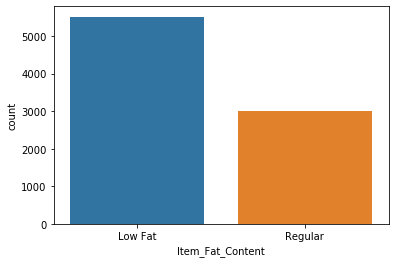

In [21]:
sns.countplot(x='Item_Fat_Content',data=df)

In [22]:
## checking for item type frequency value

In [23]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

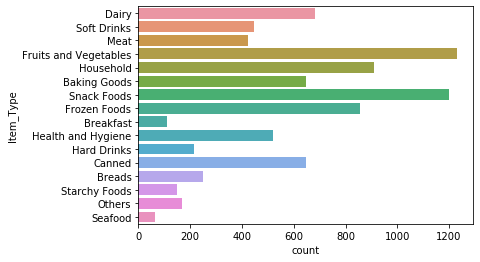

In [24]:
sns.countplot(y='Item_Type',data=df)

In [25]:
## checking for Outlet_Identifier frequency value

In [26]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

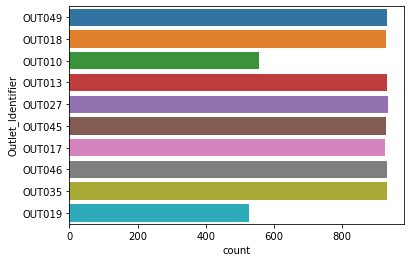

In [27]:
sns.countplot(y='Outlet_Identifier',data=df)

In [28]:
## checking for Outlet_size frequency value

In [29]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

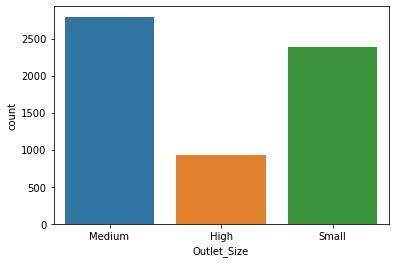

In [30]:
sns.countplot(x='Outlet_Size',data=df)

In [31]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

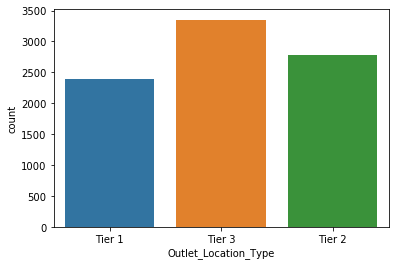

In [32]:
sns.countplot(x='Outlet_Location_Type',data=df)

In [33]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

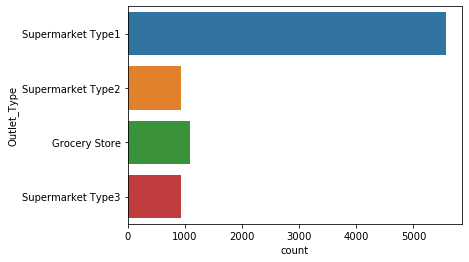

In [34]:
sns.countplot(y='Outlet_Type',data=df)

In [35]:
## outlet type wrt Item fat content

### low fat content has more content on outlet

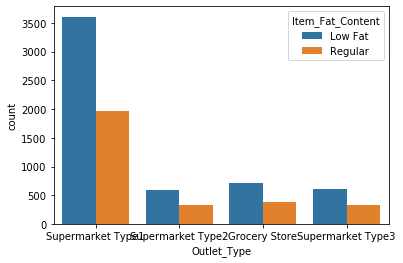

In [36]:
sns.countplot(x='Outlet_Type',hue='Item_Fat_Content',data=df)
plt.show()

In [37]:
## outlet location type wrt outletsize

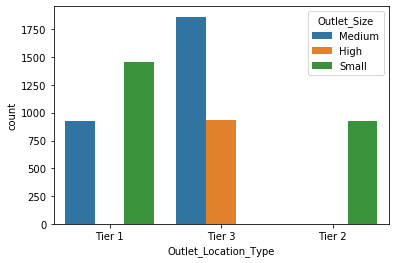

In [38]:
sns.countplot(x='Outlet_Location_Type',hue='Outlet_Size',data=df)

In [39]:
## filling null values with mean

In [40]:

df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [41]:
df.fillna(method='pad',inplace=True)

In [42]:
## checking null values

In [43]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
df['Outlet_Size'].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

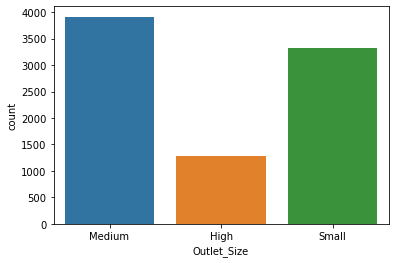

In [45]:
sns.countplot(x='Outlet_Size',data=df)

In [46]:
## checking for corelation


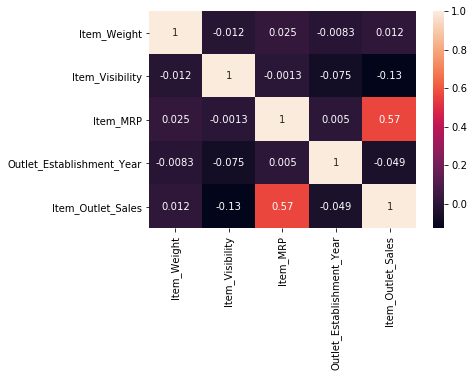

In [47]:
data_corr=df.corr()

sns.heatmap(data=data_corr,annot=True)

In [48]:
## Using label encoder for object dtype

In [49]:
df['Item_Fat_Content'] = LabelEncoder().fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = LabelEncoder().fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = LabelEncoder().fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=LabelEncoder().fit_transform(df['Outlet_Size'])
df['Outlet_Establishment_Year'] = LabelEncoder().fit_transform(df['Outlet_Establishment_Year'])
df['Outlet_Location_Type'] = LabelEncoder().fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = LabelEncoder().fit_transform(df['Outlet_Type'])

In [50]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,5,0,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,8,1,2,2,1845.5976


In [51]:
## plotting pairplot with respect to Item fat content

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


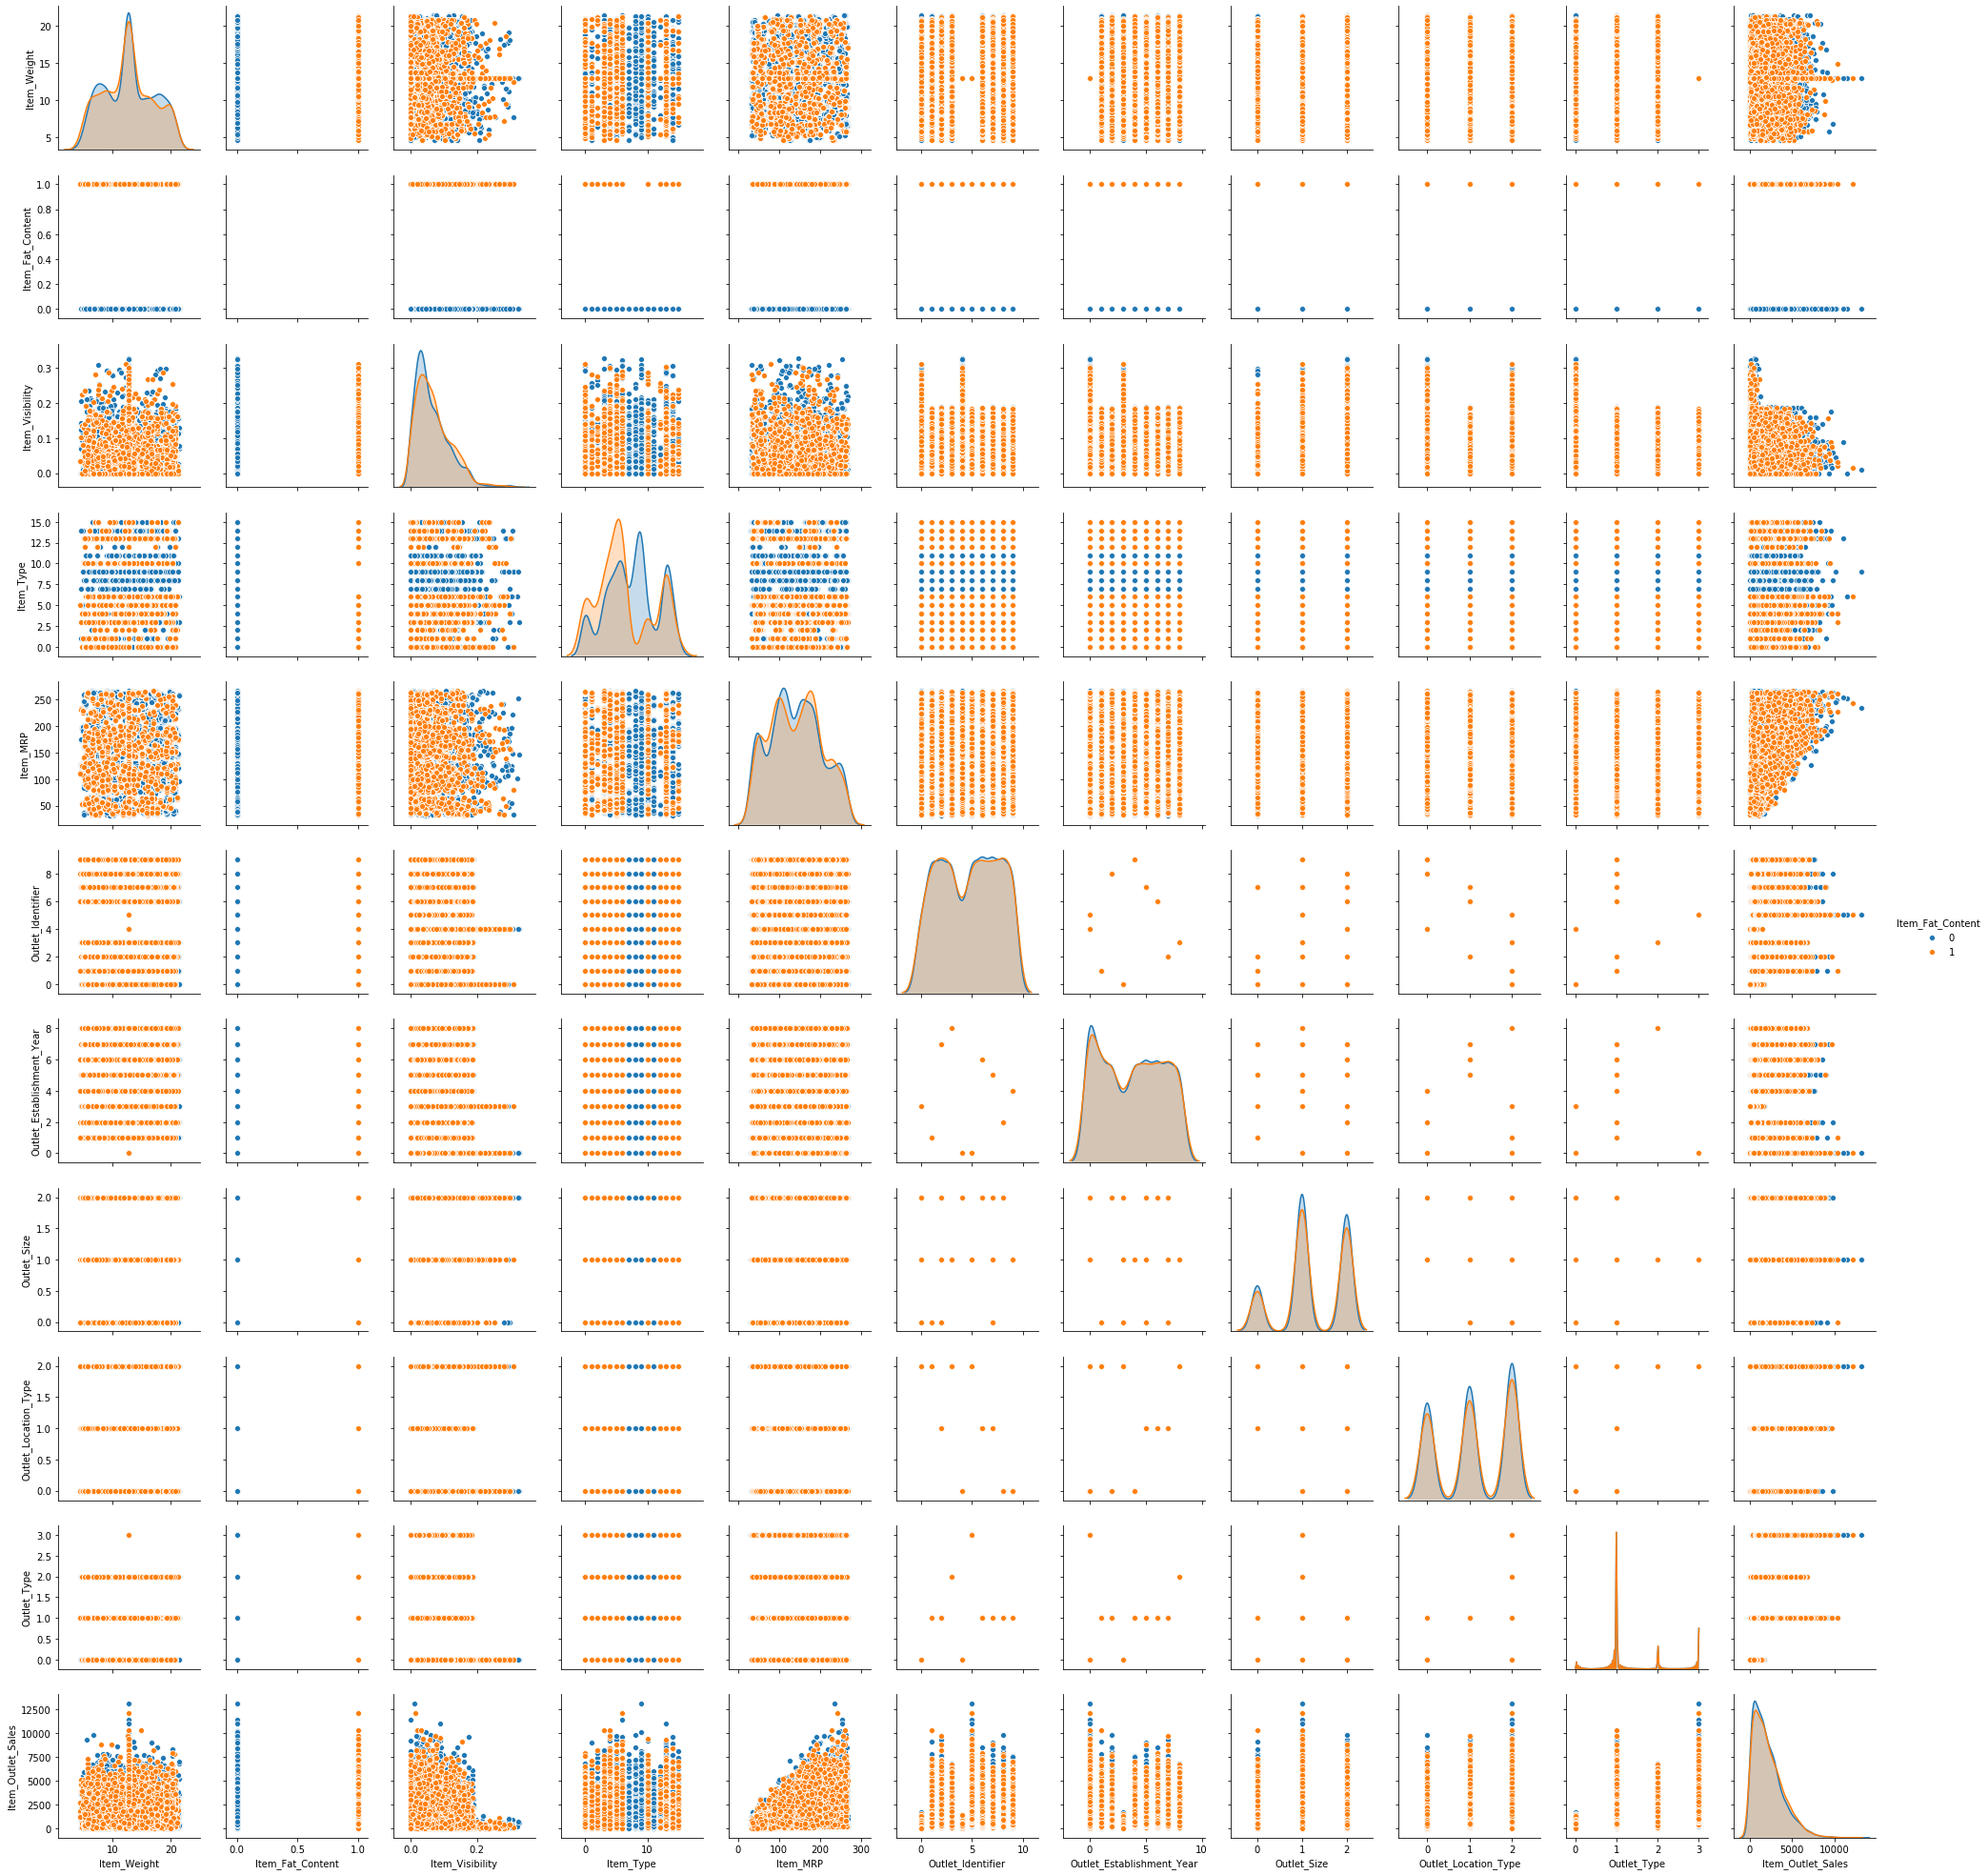

In [52]:
sns.pairplot(data=df,hue='Item_Fat_Content')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int32(6), int64(1)
memory usage: 532.8 KB


In [54]:
## visualizing box plotb

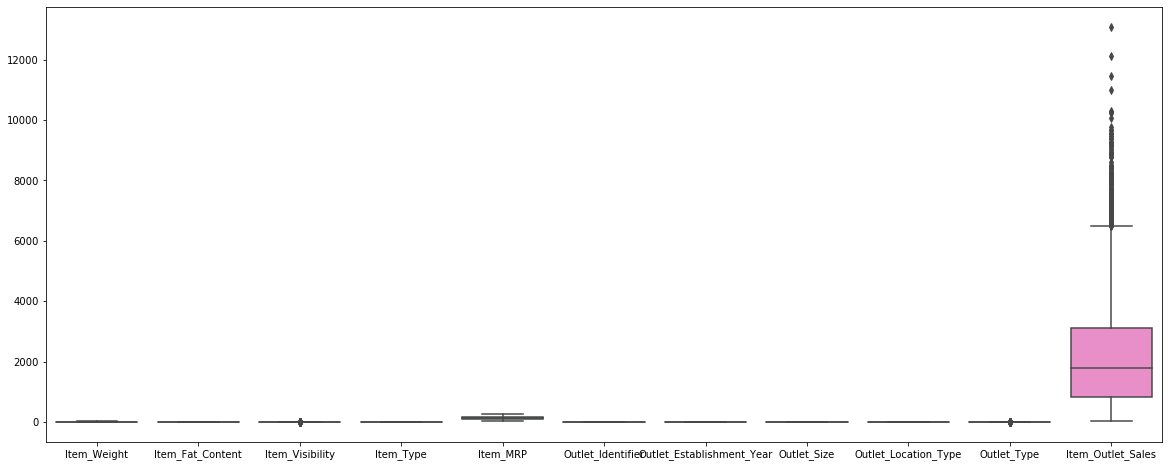

In [55]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)
plt.show()

In [56]:
## Splitting Independent and Dependent variable

In [57]:
x=df[['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year',
      'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]
y=df.iloc[:,1].values

In [58]:
## applying train test split

In [59]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=0,stratify=y)

In [60]:
## size of train and test data

In [61]:
print(train_x.shape,test_x.shape)

(7670, 10) (853, 10)


In [62]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 967 to 3035
Data columns (total 10 columns):
Item_Weight                  7670 non-null float64
Item_Visibility              7670 non-null float64
Item_Type                    7670 non-null int32
Item_MRP                     7670 non-null float64
Outlet_Identifier            7670 non-null int32
Outlet_Establishment_Year    7670 non-null int64
Outlet_Size                  7670 non-null int32
Outlet_Location_Type         7670 non-null int32
Outlet_Type                  7670 non-null int32
Item_Outlet_Sales            7670 non-null float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 509.3 KB


In [63]:
## applying feature selection 

In [64]:
sel=f_classif(train_x,train_y)

In [65]:
## getting Ftest value and P value

In [66]:
sel

(array([5.22392789e+00, 1.82712745e+01, 1.56539401e+02, 1.11392711e-02,
        3.07855763e-03, 6.02260039e-01, 7.54648716e-01, 6.68200960e-04,
        3.14892746e-02, 3.49886809e+00]),
 array([2.23053388e-02, 1.93893740e-05, 1.43380414e-35, 9.15947914e-01,
        9.55753723e-01, 4.37740951e-01, 3.85035587e-01, 9.79377986e-01,
        8.59157914e-01, 6.14488520e-02]))

In [67]:
p_values=pd.Series(sel[1])
p_values.index=train_x.columns
p_values.sort_values(ascending=True,inplace=True)

In [68]:
## plotting p values

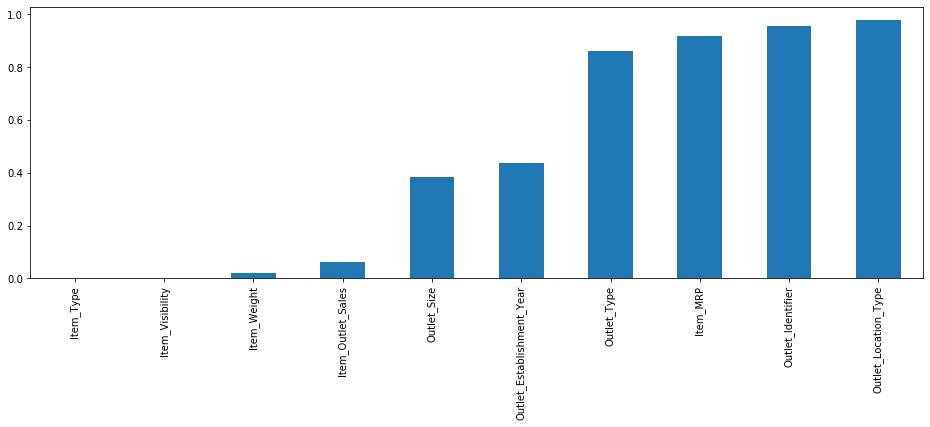

In [69]:
p_values.plot.bar(figsize=(16,5))

In [70]:
## getting p value greater then 0.05 bcz it shows the feature which accepted the null hypothesis

In [71]:
p_values = p_values[p_values<0.05]
X_train_p = train_x[p_values.index]
X_test_p = test_x[p_values.index]

In [72]:
## indexes of those feature

In [73]:
p_values.index

Index(['Item_Type', 'Item_Visibility', 'Item_Weight'], dtype='object')

In [74]:
## selected feature train and test

In [75]:
X_train_p =train_x[p_values.index]
X_test_p = test_x[p_values.index]

In [76]:
## applying KNN Algo

In [77]:
# knn=KNeighborsClassifier(n_neighbors=3)

def knn(train_x, test_x, train_y,test_y):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    print('Accuracy: ', accuracy_score(test_y, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(test_y, y_pred))
    print()
    print('Classification Report')
    print(classification_report(test_y,y_pred))
    

In [78]:
## Accuracy before feature selection

In [79]:
knn(train_x, test_x, train_y,test_y)

Accuracy:  0.5873388042203986
Confusion Matrix
[[402 150]
 [202  99]]

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       552
           1       0.40      0.33      0.36       301

    accuracy                           0.59       853
   macro avg       0.53      0.53      0.53       853
weighted avg       0.57      0.59      0.58       853



In [80]:
## Accuracy After Feature selection and accuracy incraeses

In [81]:
%%time
knn(X_train_p, X_test_p, train_y, test_y)

Accuracy:  0.9261430246189918
Confusion Matrix
[[528  24]
 [ 39 262]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       552
           1       0.92      0.87      0.89       301

    accuracy                           0.93       853
   macro avg       0.92      0.91      0.92       853
weighted avg       0.93      0.93      0.93       853

Wall time: 92 ms


In [82]:
## Applying RandomForest

In [83]:

def run_randomForest(train_x, test_x, train_y,test_y):
    clf = RandomForestClassifier(n_estimators=300, random_state=0, n_jobs = -1)
    clf.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    print('Accuracy: ', accuracy_score(test_y, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(test_y, y_pred))
    print()
    print('Classification Report')
    print(classification_report(test_y,y_pred))
    

In [84]:
## Accuracy before feature selection

In [85]:
run_randomForest(train_x, test_x, train_y,test_y)

Accuracy:  0.8593200468933178
Confusion Matrix
[[527  25]
 [ 95 206]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       552
           1       0.89      0.68      0.77       301

    accuracy                           0.86       853
   macro avg       0.87      0.82      0.84       853
weighted avg       0.86      0.86      0.85       853



In [86]:
## Accuracy After Feature selection and accuracy incraeses

In [87]:
run_randomForest(X_train_p, X_test_p, train_y, test_y)

Accuracy:  0.917936694021102
Confusion Matrix
[[516  36]
 [ 34 267]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       552
           1       0.88      0.89      0.88       301

    accuracy                           0.92       853
   macro avg       0.91      0.91      0.91       853
weighted avg       0.92      0.92      0.92       853



In [88]:
fpr, tpr, threshold = roc_curve(test_y, y_pred,  )

NameError: name 'y_pred' is not defined